Discussed with Jacob and Manya

# 1

## a

Linear models with a large number of features are considered less interpretable in terms of simulatability, decomposability, and algorithmic transparency. In class we defined simulatability as "Can a human reasonably simulate the model given its parameters and input data?". In terms of this, the larger the number of features, the harder it is for one to mentally simulate the model because it is hard to think about all of the feature interactions. Decomposability is defined as "Does each model component have an intuitive role?" which as we increase the number of features, there are more dependencies between the features so it is not as intuitive which features lead to what impact on the outcome. Algorithmic transparency is defined as "Can we prove things about the learning algorithm?". We have developed a lot of theory about how linear models learn, but as we increase the features, the more feature dependencies there are which adds complexity, making it harder to understand how the model is learning. 

## b

Concept bottlenecks are a method that uses a model to predict a numner of different concepts, intermediate featrues such as color, shape, texture, ect, and then from those concepts predicts the output. These concepts can be used for explanability and can be modified to see how the model changes it's prediction. TCAV is a post-hoc method to identify concepts in a model's latent space by choosing a hidden layer and calculating concept activation vectors in the direction that best linearly separated certain concepts.  Concept bottlenecks require more concept labels than TCAV because they are needed for training the model. 

## c

The optimization procedure used to visualize what activates a neuron within a neural network finds a local optimum that maximizes the activation of a node at a specific layer by either iterating over dataset where the solution is guaranteed to be a real example or by using gradient descent where there is not guaranteed to be a real example. The advantage of using this over the dataset examples is that activation maximization is general and only requires the model is differentiable with respect to the inputs. The disadvantage is that neurons may not correspond to simple, human-interpretable concepts and there are many neurons to interpret which can be computationally expensive. 

## d


Leverage scores in linear regression are a measure of training sample influence. Leverage scores are calculated as the diagonal elements of the hat matrix in the closed form solution of the linear model. Here we have the solution of the coefficients:

$\Beta^* = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{Y}$

Then our soltution for predictions is:


$\hat{\mathbf{Y}} = \mathbf{X}\Beta^* = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{Y}$

The hat matrix ($\mathbf{H}_{ij} = \frac{\partial \hat{y_i}}{\partial y_j}$) is the matrix that maps the training response values to the predicted response values:

$\hat{\mathbf{Y}} = \mathbf{H}\mathbf{Y}$

# 2

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [157]:
df = pd.read_csv('winequality-red.csv')
X = df.drop(columns=['quality'])
y = df['quality']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=42)

## a

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [141]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [142]:
y_pred = regr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.6513095193379138

The RMSE is 0.6513

In [143]:
coef_names = X_train.columns
coef = regr.coef_

Text(0.5, 1.0, 'Coefficients for Features')

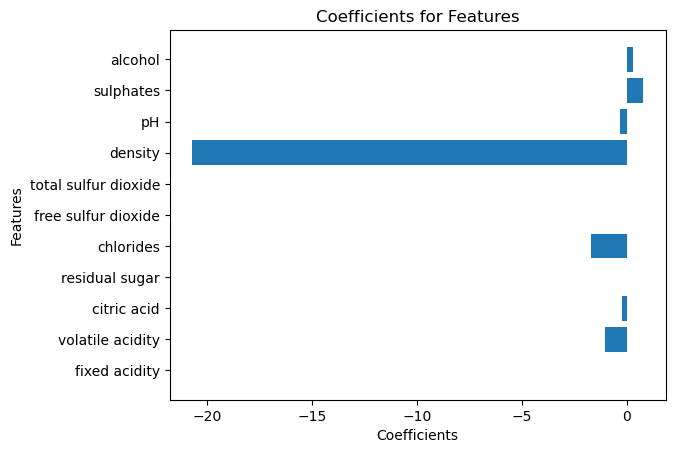

In [22]:
plt.barh(coef_names, coef)
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.title("Coefficients for Features")

## b

In [23]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_test_norm = (X_test - np.mean(X_test)) / np.std(X_test)



In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'


In [24]:
regr_norm = LinearRegression()
regr_norm.fit(X_train_norm, y_train)

LinearRegression()

In [25]:
y_pred_norm = regr_norm.predict(X_test_norm)
rmse_norm = np.sqrt(mean_squared_error(y_test, y_pred_norm))
rmse_norm

0.6520700614201561

After normalizing the RMSE is 0.6520


Text(0.5, 1.0, 'Coefficients for Normalized Features')

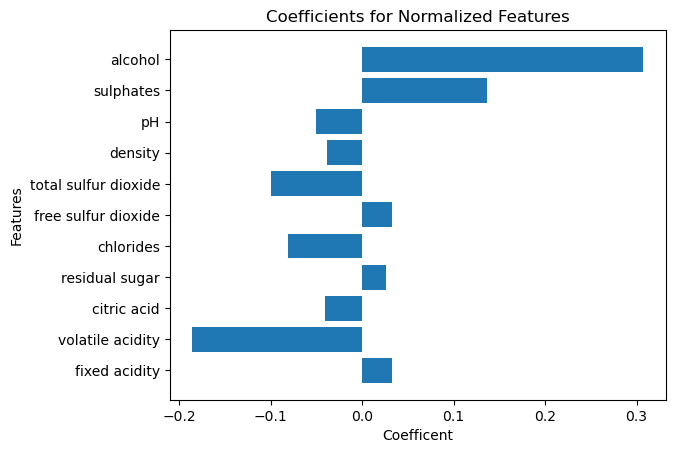

In [26]:
plt.barh(coef_names, regr_norm.coef_)
plt.xlabel('Coefficent')
plt.ylabel("Features")
plt.title("Coefficients for Normalized Features")

Alcohol and Volatile Acidity appear to be important features for predicting wine quality.

## C

In [28]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [29]:
alpha_lasso = 0.1
alpha_ridge = 10.0
lasso = Lasso(alpha_lasso)
ridge = Ridge(alpha_ridge)

lasso.fit(X_train_norm, y_train)
ridge.fit(X_train_norm, y_train)

Ridge(alpha=10.0)

In [30]:
lasso_pred = lasso.predict(X_test_norm)
rmse_lasso = np.sqrt(mean_squared_error(y_test, lasso_pred))

ridge_pred = ridge.predict(X_test_norm)
rmse_ridge = np.sqrt(mean_squared_error(y_test, ridge_pred))

print("RMSE Lasso", rmse_lasso)
print("RMSE Ridge", rmse_ridge)


RMSE Lasso 0.6919336494182097
RMSE Ridge 0.6521729651253451


Text(0.5, 1.0, 'Coefficients for Lasso Features')

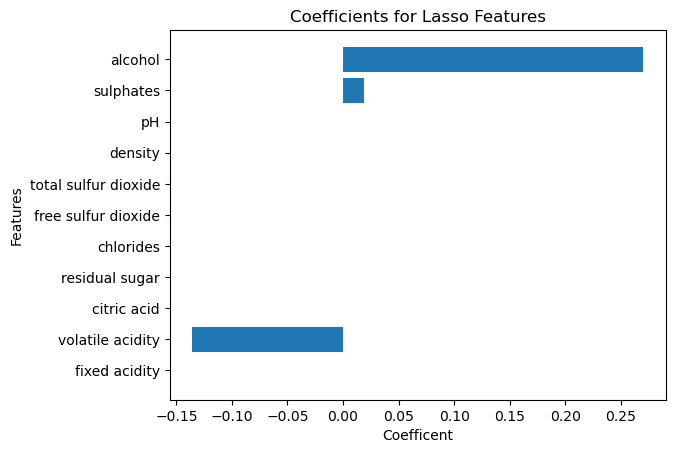

In [31]:
plt.barh(coef_names, lasso.coef_)
plt.xlabel('Coefficent')
plt.ylabel("Features")
plt.title("Coefficients for Lasso Features")

Text(0.5, 1.0, 'Coefficients for Ridge Features')

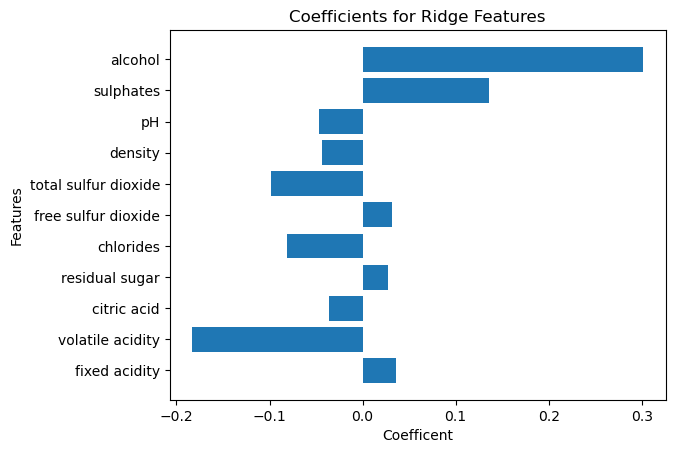

In [32]:
plt.barh(coef_names, ridge.coef_)
plt.xlabel('Coefficent')
plt.ylabel("Features")
plt.title("Coefficients for Ridge Features")

## d

In [33]:
alpha_lasso_list = [0.001, 0.01, 0.1, 1]
rmse_list = []
coef_list = []

for alpha in alpha_lasso_list:
    lasso = Lasso(alpha)
    lasso.fit(X_train_norm, y_train)
    coef_list.append(lasso.coef_)
    lasso_pred = lasso.predict(X_test_norm)
    rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
    rmse_list.append(rmse)


Text(0.5, 1.0, 'Test RMSE vs Alpha Values')

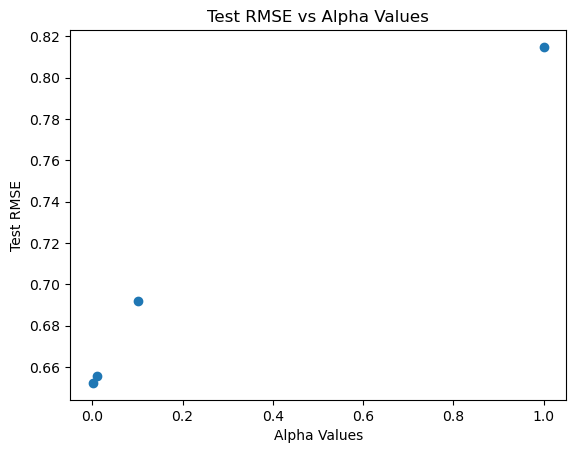

In [34]:
plt.scatter(alpha_lasso_list, rmse_list)
plt.xlabel("Alpha Values")
plt.ylabel("Test RMSE")
plt.title("Test RMSE vs Alpha Values")

In [35]:
zero_coef_count = []
for coef in coef_list:
    count = 0
    for c in coef:
        if c ==0:
            count += 1

    zero_coef_count.append(count)


Text(0.5, 1.0, 'Number of Zero Coef vs Alpha Values')

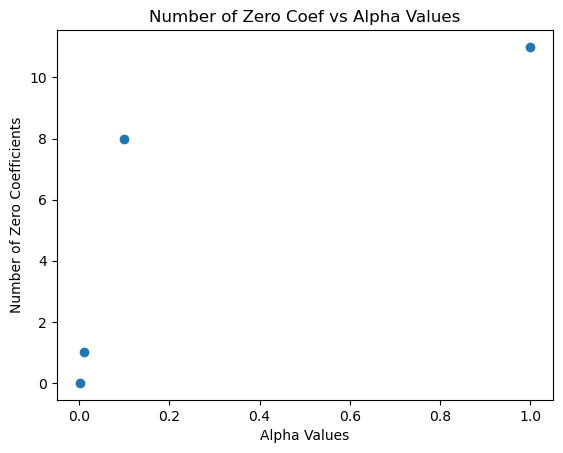

In [36]:
plt.scatter(alpha_lasso_list, zero_coef_count)
plt.xlabel("Alpha Values")
plt.ylabel("Number of Zero Coefficients")
plt.title("Number of Zero Coef vs Alpha Values")

Text(0.5, 1.0, 'Test RMSE vs Number of Zero Coef')

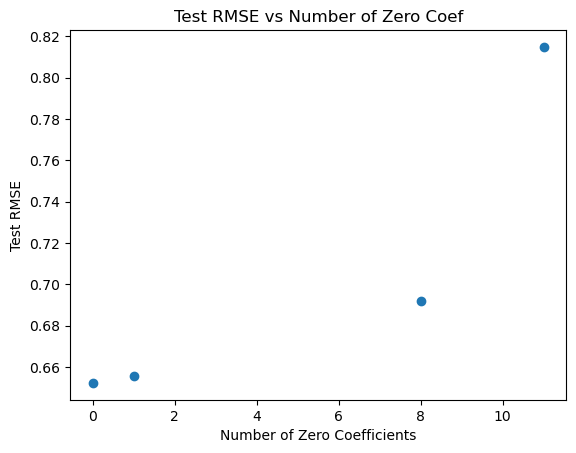

In [37]:
plt.scatter(zero_coef_count, rmse_list)
plt.xlabel("Number of Zero Coefficients")
plt.ylabel("Test RMSE")
plt.title("Test RMSE vs Number of Zero Coef")

If sparsity is viewed as a surrogate for
interpretability, what does the third plot say about the accuracy-interpretability tradeoff?

As the number of zero coefficients increases, the test RMSE increases as well. The more zero coefficients that we have, the more interpretable our model is, but also the less accurate it is. As interpretability increases, accuracy decreases.

## e

<Figure size 640x480 with 0 Axes>

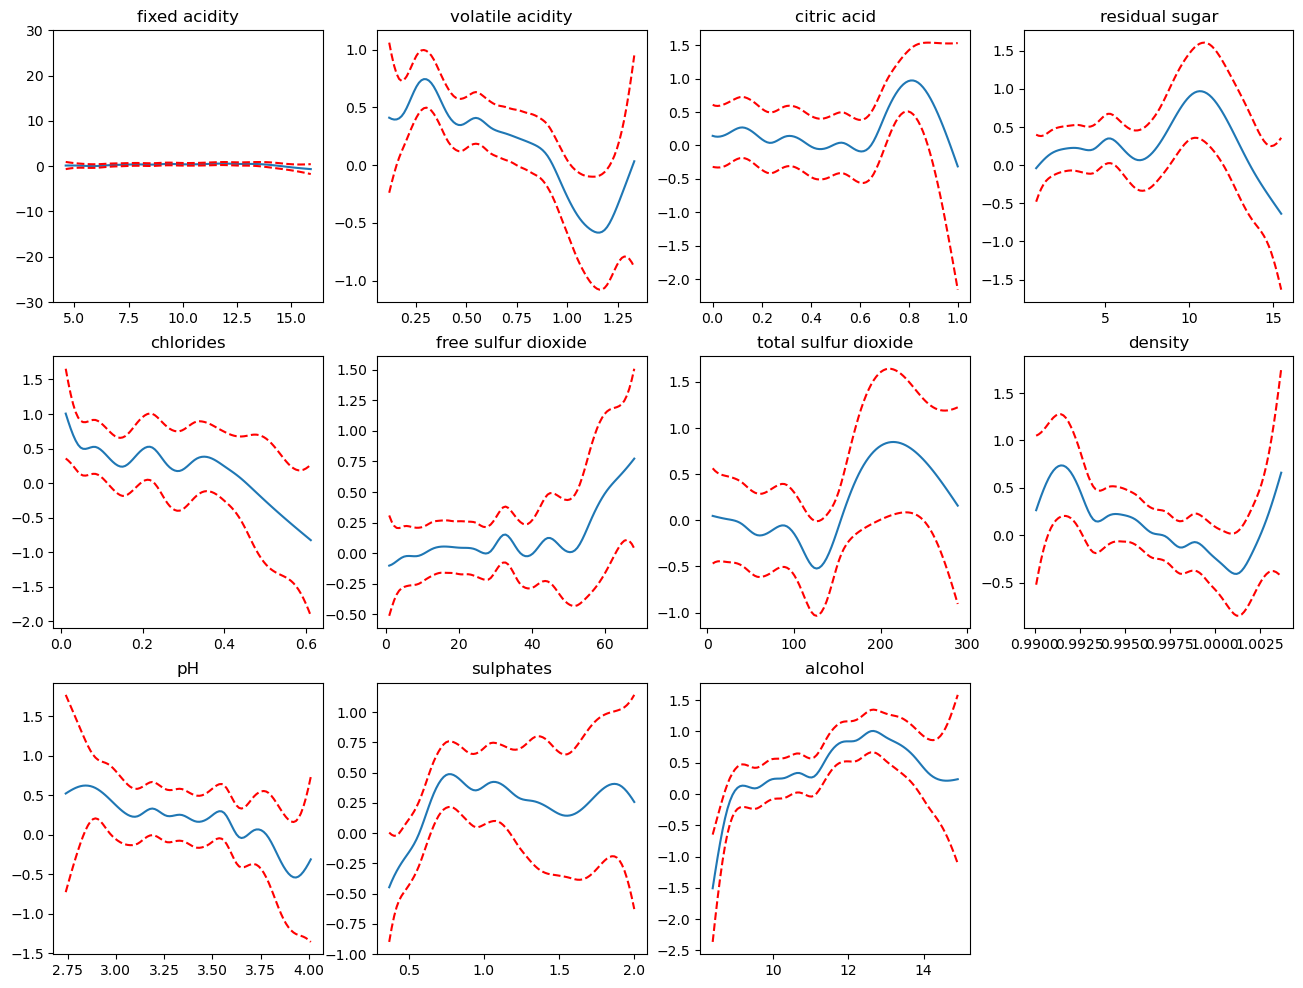

In [177]:
from pygam import LinearGAM, s

gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10))


gam.fit(X_train, y_train)

y_pred= gam.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

plt.figure()
fig, axs = plt.subplots(3, 4, figsize=(16,12))
axs = axs.flatten()
titles = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
for i, ax in enumerate(axs[:11]):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])

fig.delaxes(axs[11])

In [178]:
print(rmse)

0.6737828660097818


Yes the results agree with the experts because volatile acids and alcohol are two of the main things that impact wine quality. 

## f

In [181]:
from sklearn.ensemble import GradientBoostingRegressor

# Weak baseline

weak_baseline_model = np.mean(y_train)

y_pred_weak_base = np.full_like(y_test, weak_baseline_model)

rmse_weak_base = np.sqrt(mean_squared_error(y_test, y_pred_weak_base))

print("Weak Baseline RMSE: ", rmse_weak_base)

# Strong Baseline

grad_boost = GradientBoostingRegressor()

grad_boost.fit(X_train, y_train)

y_pred_strong_base = grad_boost.predict(X_test)

rmse_strong_base = np.sqrt(mean_squared_error(y_test, y_pred_strong_base))


print("Strong Baseline RMSE: ", rmse_strong_base)



Weak Baseline RMSE:  1.050793351076541
Strong Baseline RMSE:  0.6514828977930693


The weak baseline RMSE is higher than the previous models RMSE while the strong baseline RMSE is pretty consistent with the RMSE from the previous models. 

# 3

In [1]:
import shap
import numpy as np
from sklearn.model_selection import train_test_split

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [102]:
def load_mislabeled_data(test_size=0.99, n_flips=50, seed=1904):
    """ Load census dataset and mislabel samples.
    Args:
        test_size: Percentage of data to reserve for test data.
            Use this parameter to shrink the size of the training data.
        n_flips: number of training labels to flip.
        seed: random seed to randomly choose samples to flip.


    Returns:
        X_train: training input data.
        X_test: testing input data.
        y_train: training output.
        y_test: testing output.
        is_flip: boolean array representing mislabeled samples.

    """

    X, y = shap.datasets.adult()

    #Train/Test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=7)

    #Randomly mislabel training data
    np.random.seed(seed)
    flip_inds = np.random.choice(
        range(X_train.shape[0]), n_flips, replace=False)

    is_flip = np.zeros(X_train.shape[0]).astype('bool')
    is_flip [flip_inds] = True
    y_train [flip_inds] = 1 - y_train [flip_inds]

    return X_train , X_test , y_train , y_test , is_flip

### a

In [103]:
data = load_mislabeled_data(test_size=0.99)

In [47]:
data[0]

,Age,Workclass,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country
2484,40.0,4,16.0,2,10,4,4,1,0.0,0.0,40.0,39
23018,35.0,4,10.0,2,1,4,4,1,0.0,0.0,50.0,39
366,56.0,6,10.0,2,12,4,4,1,0.0,0.0,45.0,39
12093,24.0,0,10.0,4,0,0,1,1,99999.0,0.0,50.0,35
22577,45.0,4,9.0,2,14,4,4,1,0.0,0.0,50.0,39
...,...,...,...,...,...,...,...,...,...,...,...,...
5699,23.0,4,9.0,4,12,0,4,1,0.0,0.0,40.0,39
10742,37.0,4,9.0,2,7,4,4,1,0.0,0.0,40.0,39
16921,27.0,6,5.0,2,3,4,4,1,0.0,0.0,40.0,39
25796,46.0,4,16.0,2,10,4,4,1,0.0,2415.0,55.0,39


There are 325 training samples in this dataset. The loading function randomly selects indicies and then flips the y_train label at that index.

## b

In [104]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score


In [105]:

X_train , X_test , y_train , y_test , is_flip = data
importance_scores = np.random.rand(len(X_train))

auroc = roc_auc_score(is_flip, importance_scores)
aupr = average_precision_score(is_flip, importance_scores)

print('AUROC: ', auroc)
print('AUPR: ', aupr)

AUROC:  0.47418181818181815
AUPR:  0.1596671711010179


The AUROC of 0.47 is close to 0.5 meaning that it performs about as good as random for identifying mislabeled samples and the AUPR of 0.159 means that the importance scores have a high false positive or false negative rate so the importnace scores are not accuratly indentifying mislabeled samples.

Text(0.5, 1.0, 'Importance Values for Normal vs Mislabeled Samples')

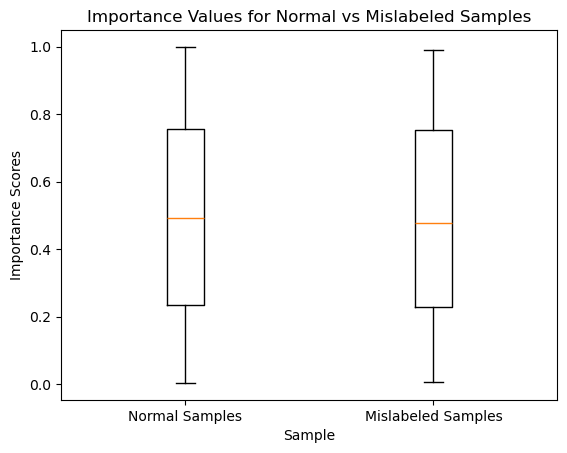

In [106]:
normal_importance_scores = importance_scores[is_flip == False]
mislabeled_importance_scores = importance_scores[is_flip == True ]

plt.boxplot([normal_importance_scores, mislabeled_importance_scores], labels=["Normal Samples", "Mislabeled Samples"])
plt.xlabel("Sample")
plt.ylabel("Importance Scores")
plt.title("Importance Values for Normal vs Mislabeled Samples")


## c

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler

In [107]:
log_reg = LogisticRegression()

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [108]:
importance_scores = []
for i in range(len(X_train_scaled)):
    X_train_wo_i = np.delete(X_train_scaled,i, axis=0)
    y_train_wo_i = np.delete(y_train, i)

    log_reg_loo = LogisticRegression()
    log_reg_loo.fit(X_train_wo_i, y_train_wo_i)

    full_pred = log_reg.predict_proba(X_test_scaled)
    full_model_loss = log_loss(y_test, full_pred)

    loo_pred = log_reg_loo.predict_proba(X_test_scaled)
    loo_model_loss = log_loss(y_test, loo_pred)

    score = full_model_loss - loo_model_loss

    importance_scores.append(score)



In [109]:
auroc = roc_auc_score(is_flip, importance_scores)
aupr = average_precision_score(is_flip, importance_scores)
print('AUROC: ', auroc)
print('AUPR: ', aupr)

AUROC:  0.8688727272727274
AUPR:  0.6549527910699573


The AUROC of 0.869 is closer to 1 meaning that it performs good for identifying mislabeled samples and the AUPR of 0.655 means that the importance scores have a good precision recall tradeoff so it is accuratly indentifying mislabeled samples.

Text(0.5, 1.0, 'LOO Importance Values for Normal vs Mislabeled Samples')

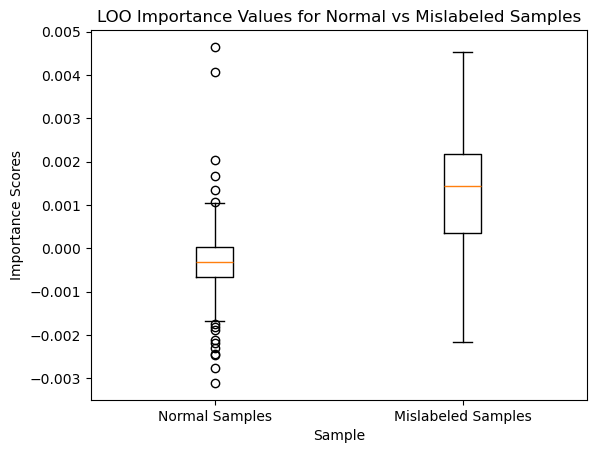

In [110]:
normal_importance_scores = np.array(importance_scores)[is_flip == False]
mislabeled_importance_scores = np.array(importance_scores)[is_flip == True]

plt.boxplot([normal_importance_scores, mislabeled_importance_scores], labels=["Normal Samples", "Mislabeled Samples"])
plt.xlabel("Sample")
plt.ylabel("Importance Scores")
plt.title("LOO Importance Values for Normal vs Mislabeled Samples")

## d

### medium dataset

In [111]:
data = load_mislabeled_data(test_size=0.95)

X_train , X_test , y_train , y_test , is_flip = data
importance_scores = np.random.rand(len(X_train))

auroc = roc_auc_score(is_flip, importance_scores)
aupr = average_precision_score(is_flip, importance_scores)

print('Random')
print('AUROC: ', auroc)
print('AUPR: ', aupr)


Random
AUROC:  0.5487832699619771
AUPR:  0.037573610275513585


Text(0.5, 1.0, 'Random Importance Values for Normal vs Mislabeled Samples')

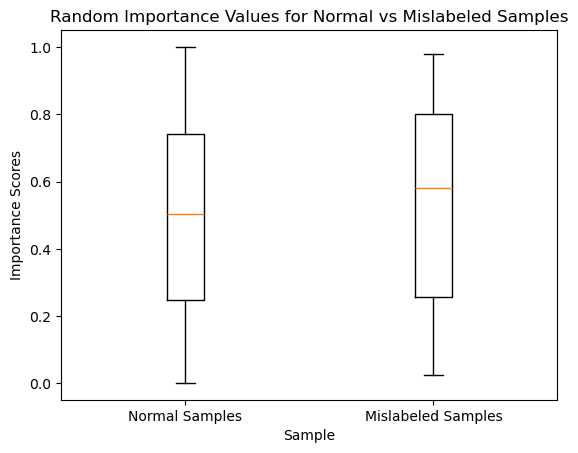

In [112]:
normal_importance_scores = importance_scores[is_flip == False]
mislabeled_importance_scores = importance_scores[is_flip == True ]

plt.boxplot([normal_importance_scores, mislabeled_importance_scores], labels=["Normal Samples", "Mislabeled Samples"])
plt.xlabel("Sample")
plt.ylabel("Importance Scores")
plt.title("Random Importance Values for Normal vs Mislabeled Samples")

In [113]:
log_reg = LogisticRegression()

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

log_reg.fit(X_train_scaled, y_train)

importance_scores = []
for i in range(len(X_train_scaled)):
    X_train_wo_i = np.delete(X_train_scaled,i, axis=0)
    y_train_wo_i = np.delete(y_train, i)

    log_reg_loo = LogisticRegression()
    log_reg_loo.fit(X_train_wo_i, y_train_wo_i)

    full_pred = log_reg.predict_proba(X_test_scaled)
    full_model_loss = log_loss(y_test, full_pred)

    loo_pred = log_reg_loo.predict_proba(X_test_scaled)
    loo_model_loss = log_loss(y_test, loo_pred)

    score = full_model_loss - loo_model_loss

    importance_scores.append(score)

In [114]:
auroc = roc_auc_score(is_flip, importance_scores)
aupr = average_precision_score(is_flip, importance_scores)

print('Leave One Out')
print('AUROC: ', auroc)
print('AUPR: ', aupr)


Leave One Out
AUROC:  0.7831242078580481
AUPR:  0.3503734620687374


Text(0.5, 1.0, 'LOO Importance Values for Normal vs Mislabeled Samples')

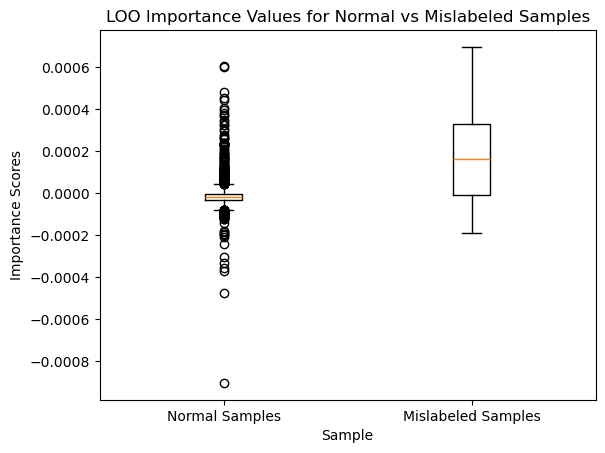

In [115]:
normal_importance_scores = np.array(importance_scores)[is_flip == False]
mislabeled_importance_scores = np.array(importance_scores)[is_flip == True]

plt.boxplot([normal_importance_scores, mislabeled_importance_scores], labels=["Normal Samples", "Mislabeled Samples"])
plt.xlabel("Sample")
plt.ylabel("Importance Scores")
plt.title("LOO Importance Values for Normal vs Mislabeled Samples")

### large dataset

In [116]:
data = load_mislabeled_data(test_size=0.90)

X_train , X_test , y_train , y_test , is_flip = data
importance_scores = np.random.rand(len(X_train))

auroc = roc_auc_score(is_flip, importance_scores)
aupr = average_precision_score(is_flip, importance_scores)

print('Random')
print('AUROC: ', auroc)
print('AUPR: ', aupr)

Random
AUROC:  0.5318402994385527
AUPR:  0.03915553634304372


Text(0.5, 1.0, 'Random Importance Values for Normal vs Mislabeled Samples')

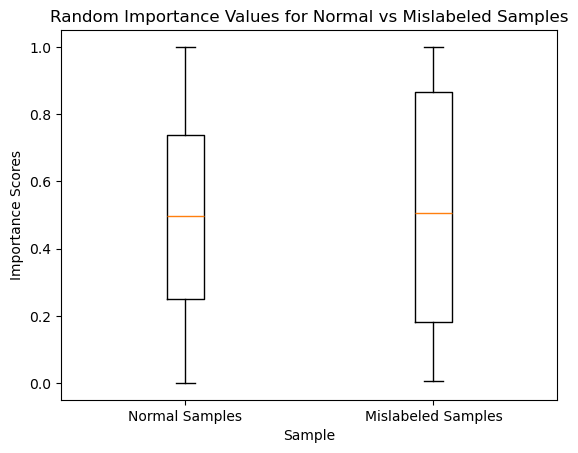

In [117]:
normal_importance_scores = importance_scores[is_flip == False]
mislabeled_importance_scores = importance_scores[is_flip == True ]

plt.boxplot([normal_importance_scores, mislabeled_importance_scores], labels=["Normal Samples", "Mislabeled Samples"])
plt.xlabel("Sample")
plt.ylabel("Importance Scores")
plt.title("Random Importance Values for Normal vs Mislabeled Samples")

In [118]:
log_reg = LogisticRegression()

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

log_reg.fit(X_train_scaled, y_train)

importance_scores = []
for i in range(len(X_train_scaled)):
    X_train_wo_i = np.delete(X_train_scaled,i, axis=0)
    y_train_wo_i = np.delete(y_train, i)

    log_reg_loo = LogisticRegression()
    log_reg_loo.fit(X_train_wo_i, y_train_wo_i)

    full_pred = log_reg.predict_proba(X_test_scaled)
    full_model_loss = log_loss(y_test, full_pred)

    loo_pred = log_reg_loo.predict_proba(X_test_scaled)
    loo_model_loss = log_loss(y_test, loo_pred)

    score = full_model_loss - loo_model_loss

    importance_scores.append(score)

In [119]:
auroc = roc_auc_score(is_flip, importance_scores)
aupr = average_precision_score(is_flip, importance_scores)

print('Leave One Out')
print('AUROC: ', auroc)
print('AUPR: ', aupr)


Leave One Out
AUROC:  0.6975109170305677
AUPR:  0.18840108042893292


Text(0.5, 1.0, 'LOO Importance Values for Normal vs Mislabeled Samples')

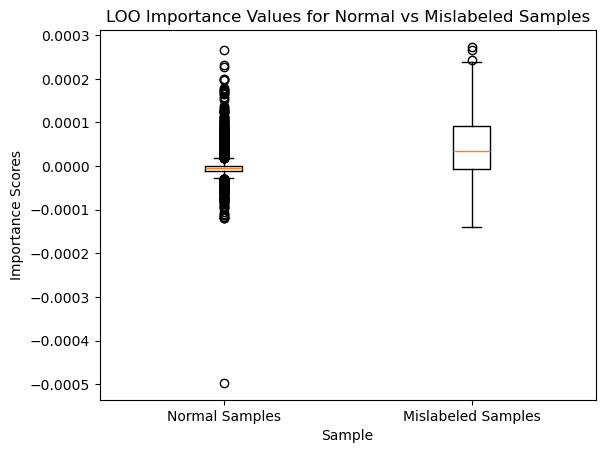

In [120]:
normal_importance_scores = np.array(importance_scores)[is_flip == False]
mislabeled_importance_scores = np.array(importance_scores)[is_flip == True]

plt.boxplot([normal_importance_scores, mislabeled_importance_scores], labels=["Normal Samples", "Mislabeled Samples"])
plt.xlabel("Sample")
plt.ylabel("Importance Scores")
plt.title("LOO Importance Values for Normal vs Mislabeled Samples")

How does leave-one-out perform for these larger datasets? Why is this the case, and how could a method like Data Shapley provide better results?

Leave one out does not perform as good on the medium and especially large dataset as it did on the small dataset. In a large dataset leaving out individual samples may not properly quanify the influence of the data point because there are still so many other data points that the model accuracy might not change much. Data Shapley would be better becuase it looks at subsets of data so that when removing them, more of an influence can be seen. 

## e

In [182]:
data = load_mislabeled_data(test_size=0.90)

X_train , X_test , y_train , y_test , is_flip = data

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model = LogisticRegression()

model.fit(X_train_scaled, y_train)

LogisticRegression()

In [99]:
pred = model.predict(X_test_scaled)

sum_per_sample_loss = log_loss(y_test, pred, normalize=False)

In [196]:
losses = []
for i in range(len(X_train_scaled)):
    pred = model.predict_proba(X_test_scaled[i].reshape(1,-1))

    per_samp_log_loss = -1*(y_test[i]*np.log(pred) + (1 - y_test[i])*np.log(1-pred))

    losses.append(np.sum(per_samp_log_loss))



In [198]:
auroc = roc_auc_score(is_flip, losses)
aupr = average_precision_score(is_flip, losses)


print('AUROC: ', auroc)
print('AUPR: ', aupr)


AUROC:  0.5144135995009358
AUPR:  0.01657383363587574


This performs similar to random according to the AUROC, but worse than Leave one out and according to AUPR, it is a lot worse than both random and leave one out. 

Text(0.5, 1.0, 'Per Sample Loss Importance Values for Normal vs Mislabeled Samples')

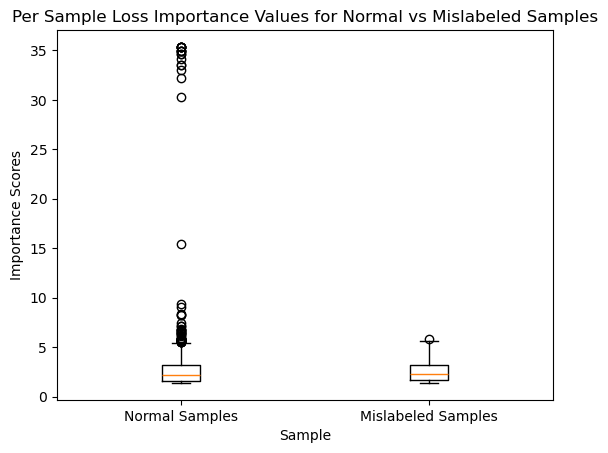

In [199]:
normal_importance_scores = np.array(losses)[is_flip == False]
mislabeled_importance_scores = np.array(losses)[is_flip == True]

plt.boxplot([normal_importance_scores, mislabeled_importance_scores], labels=["Normal Samples", "Mislabeled Samples"])
plt.xlabel("Sample")
plt.ylabel("Importance Scores")
plt.title("Per Sample Loss Importance Values for Normal vs Mislabeled Samples")